# Data 620 Week6 Assignment 6
#### Raghunathan Ramnath, Dilip Ganesan and Ahmed Sajjad

In [56]:
import networkx as nx
import networkx.algorithms.bipartite as bi
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
%matplotlib inline


### Davis Southern Club Women

These data were collected by Davis et al. in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The graph is bipartite (clubs, women).

#### Question
What can you infer about the relationships between (1) the women, and (2) the social events?

As a first step we are loading the data and we are two node sets women and clubs

In [57]:
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

### Analysis

We are listing the individual nodes in the Women Node set.

In [58]:
women

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price']

We are listing the individual nodes in the Club Node set.

In [59]:
clubs

['E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14']

Some Basic analysis on the Graph

In [60]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


The number of nodes are 32 and edges are 89

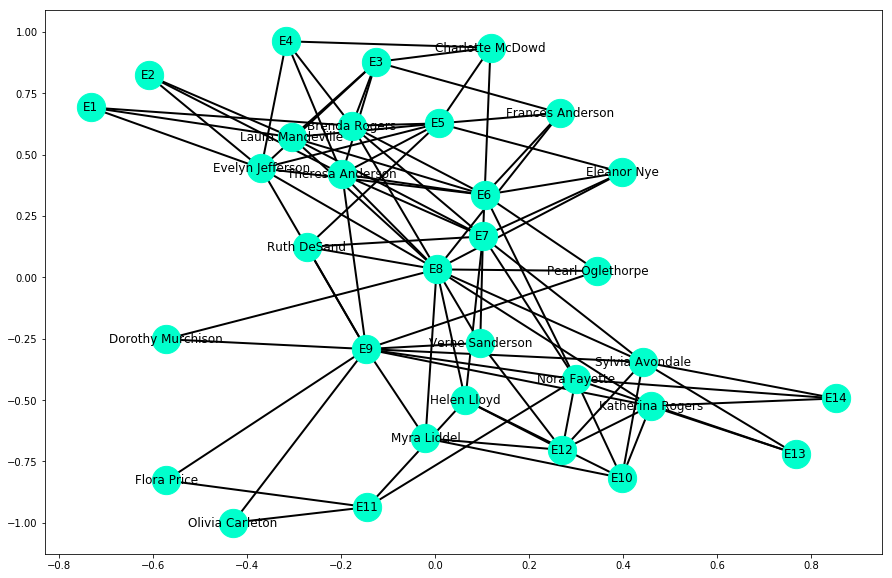

In [61]:
plt.figure(figsize = (15,10))
pos = nx.spring_layout(G, iterations=200)
nx.draw_networkx(G, pos, 
                 node_color = '#01FFCC', 
                 node_size = 800, 
                 node_shape = 'o', 
                 width = 2,
                 with_labels = True)

From the above graph we can see Nodes for both the node sets. To check whether this graph is bipartite we will use the networkx function and verify.

In [62]:
bi.is_bipartite(G) # Since the answer is True the graph is bipartite. 

True

Next what we are going to see is what is the relation between women and club, in other words how many clubs a single women is going to and vice versa. For that we have to find the projection. We can use two functions either projected_graph or weighted_projected_graph. In our case we are going to use the weighted_projected_graph, because it will give us the weightage.

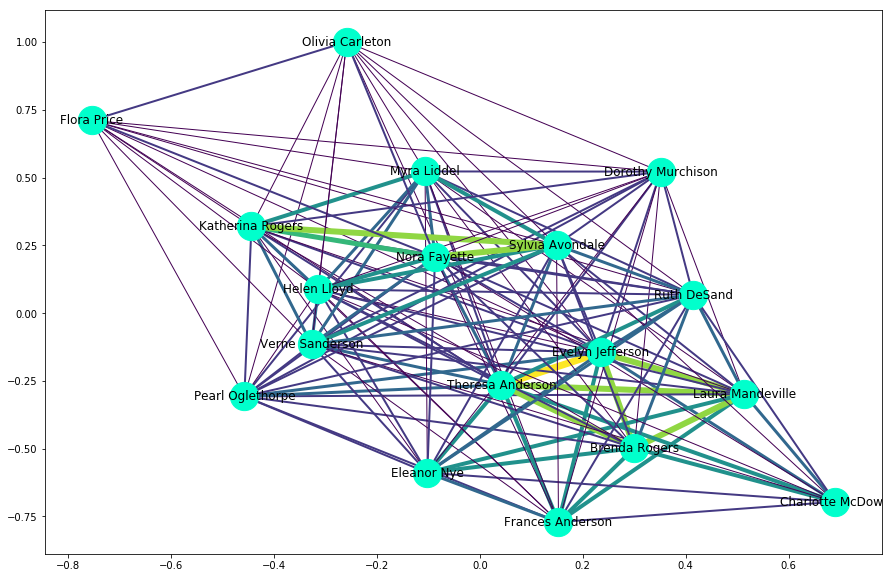

In [63]:
# Investigate the strength of the connections between the women
W = bi.weighted_projected_graph(G, women, ratio=False)
weights = [edata['weight'] for f,t,edata in W.edges(data=True)]
plt.figure(figsize=(15,10))
nx.draw_networkx(W, 
                 node_color = '#01FFCC', 
                 node_size = 800, 
                 node_shape = 'o', 
                 width=weights, 
                 edge_color=weights,
                 with_labels = True)

In [64]:
def printList(name, values):
    print(name + " :")
    for element in values:
        print(element)
    print("\n")
    return

# Degree of Women (number of edges adjacent each node)
def sort_x(x):
    sort = sorted(x.items(), key = lambda kv: (-kv[1], kv[0]) )
    return sort

w_degree = nx.degree(W)
w_degree = {k:round(v,1) for k, v in (w_degree)}
w_degree = sort_x(w_degree)

#Degree
printList("Degree", w_degree)
    
#Center
printList("Center", nx.center(W))
    
#Diameter
print("Diameter : ", nx.diameter(W))
print("\n")

#Radius
print("Radius : ", nx.radius(W))

Degree :
('Evelyn Jefferson', 17)
('Helen Lloyd', 17)
('Nora Fayette', 17)
('Ruth DeSand', 17)
('Sylvia Avondale', 17)
('Theresa Anderson', 17)
('Verne Sanderson', 17)
('Dorothy Murchison', 16)
('Katherina Rogers', 16)
('Myra Liddel', 16)
('Pearl Oglethorpe', 16)
('Brenda Rogers', 15)
('Eleanor Nye', 15)
('Frances Anderson', 15)
('Laura Mandeville', 15)
('Flora Price', 12)
('Olivia Carleton', 12)
('Charlotte McDowd', 11)


Center :
Evelyn Jefferson
Theresa Anderson
Ruth DeSand
Verne Sanderson
Sylvia Avondale
Nora Fayette
Helen Lloyd


Diameter :  2


Radius :  1


From the above diagram and stats output we can see that the center is occupied by the core 7 women of the network who have high degree.

Now as a next thing we will look at Club Events and do a projection of the graph and see what is the relationship with women.

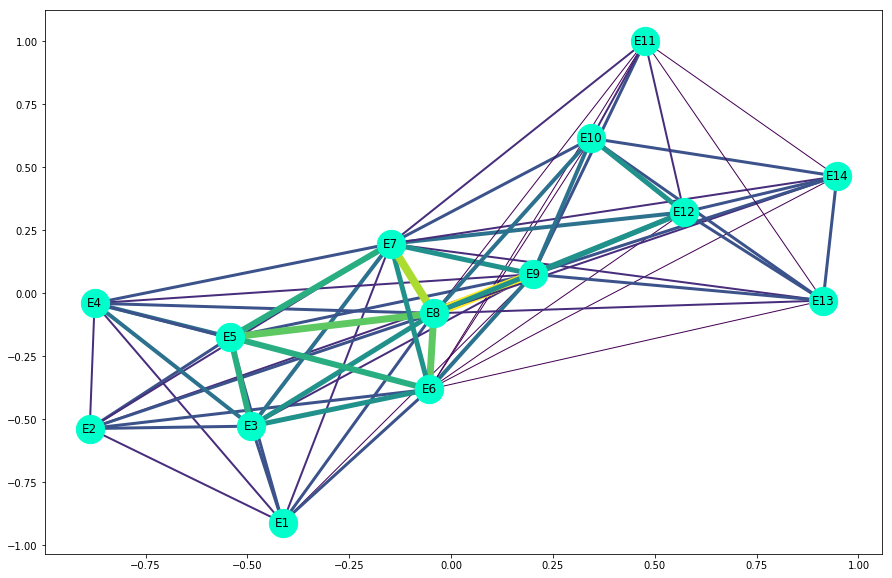

In [67]:
# Now we'll look at the clubs

G2 = nx.davis_southern_women_graph()
women = G2.graph['bottom']
clubs = G2.graph['top']
e = bi.weighted_projected_graph(G2, women, ratio=False)

# Investigate the strength of the connections between the clubs 
weights=[edata['weight'] for f,t,edata in e.edges(data=True)]
plt.figure(figsize=(15,10))
nx.draw_networkx(e, 
                 node_color = '#01FFCC', 
                 node_size = 800, 
                 node_shape = 'o', 
                 width=weights, 
                 edge_color=weights,
                 with_labels = True)

In [66]:
# Degree of clubs (number of edges adjacent each node)

e_degree = nx.degree(e)
e_degree = {k:round(v,1) for k, v in (e_degree)}
e_degree = sort_x(e_degree)

#Degree
printList("Degree", e_degree)

#Center
printList("Center", nx.center(G2))

#Diameter
print("Diameter : " ,nx.diameter(G2))
print("\n")

#Radius
print("Radius : " ,nx.radius(G2))

Degree :
('E6', 13)
('E7', 13)
('E8', 13)
('E9', 13)
('E1', 8)
('E10', 8)
('E11', 8)
('E12', 8)
('E13', 8)
('E14', 8)
('E2', 8)
('E3', 8)
('E4', 8)
('E5', 8)


Center :
Evelyn Jefferson
Theresa Anderson
Ruth DeSand
Verne Sanderson
Sylvia Avondale
Nora Fayette
Helen Lloyd
E6
E7
E8
E9


Diameter :  4


Radius :  3


From the stats output we can see the center is occupied by 4 club events(E6, E7, E8, E9) 
and not by any degree of coincidence these four clubs "E6,E7,E8 and E9" have high degree.

7 of the women from the previous analysis have high degree of 17. 
Network is centralized and closed.

So from this we can conclude that by examining the bipartite graph using projections and viewing as one mode network we can see there is a relationship between women and club events.


####  References

https://www.coursera.org/lecture/python-social-network-analysis/bipartite-graphs-tWwx2